<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MH_P2_1S2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas - P2 - 1S2024

## Enunciado

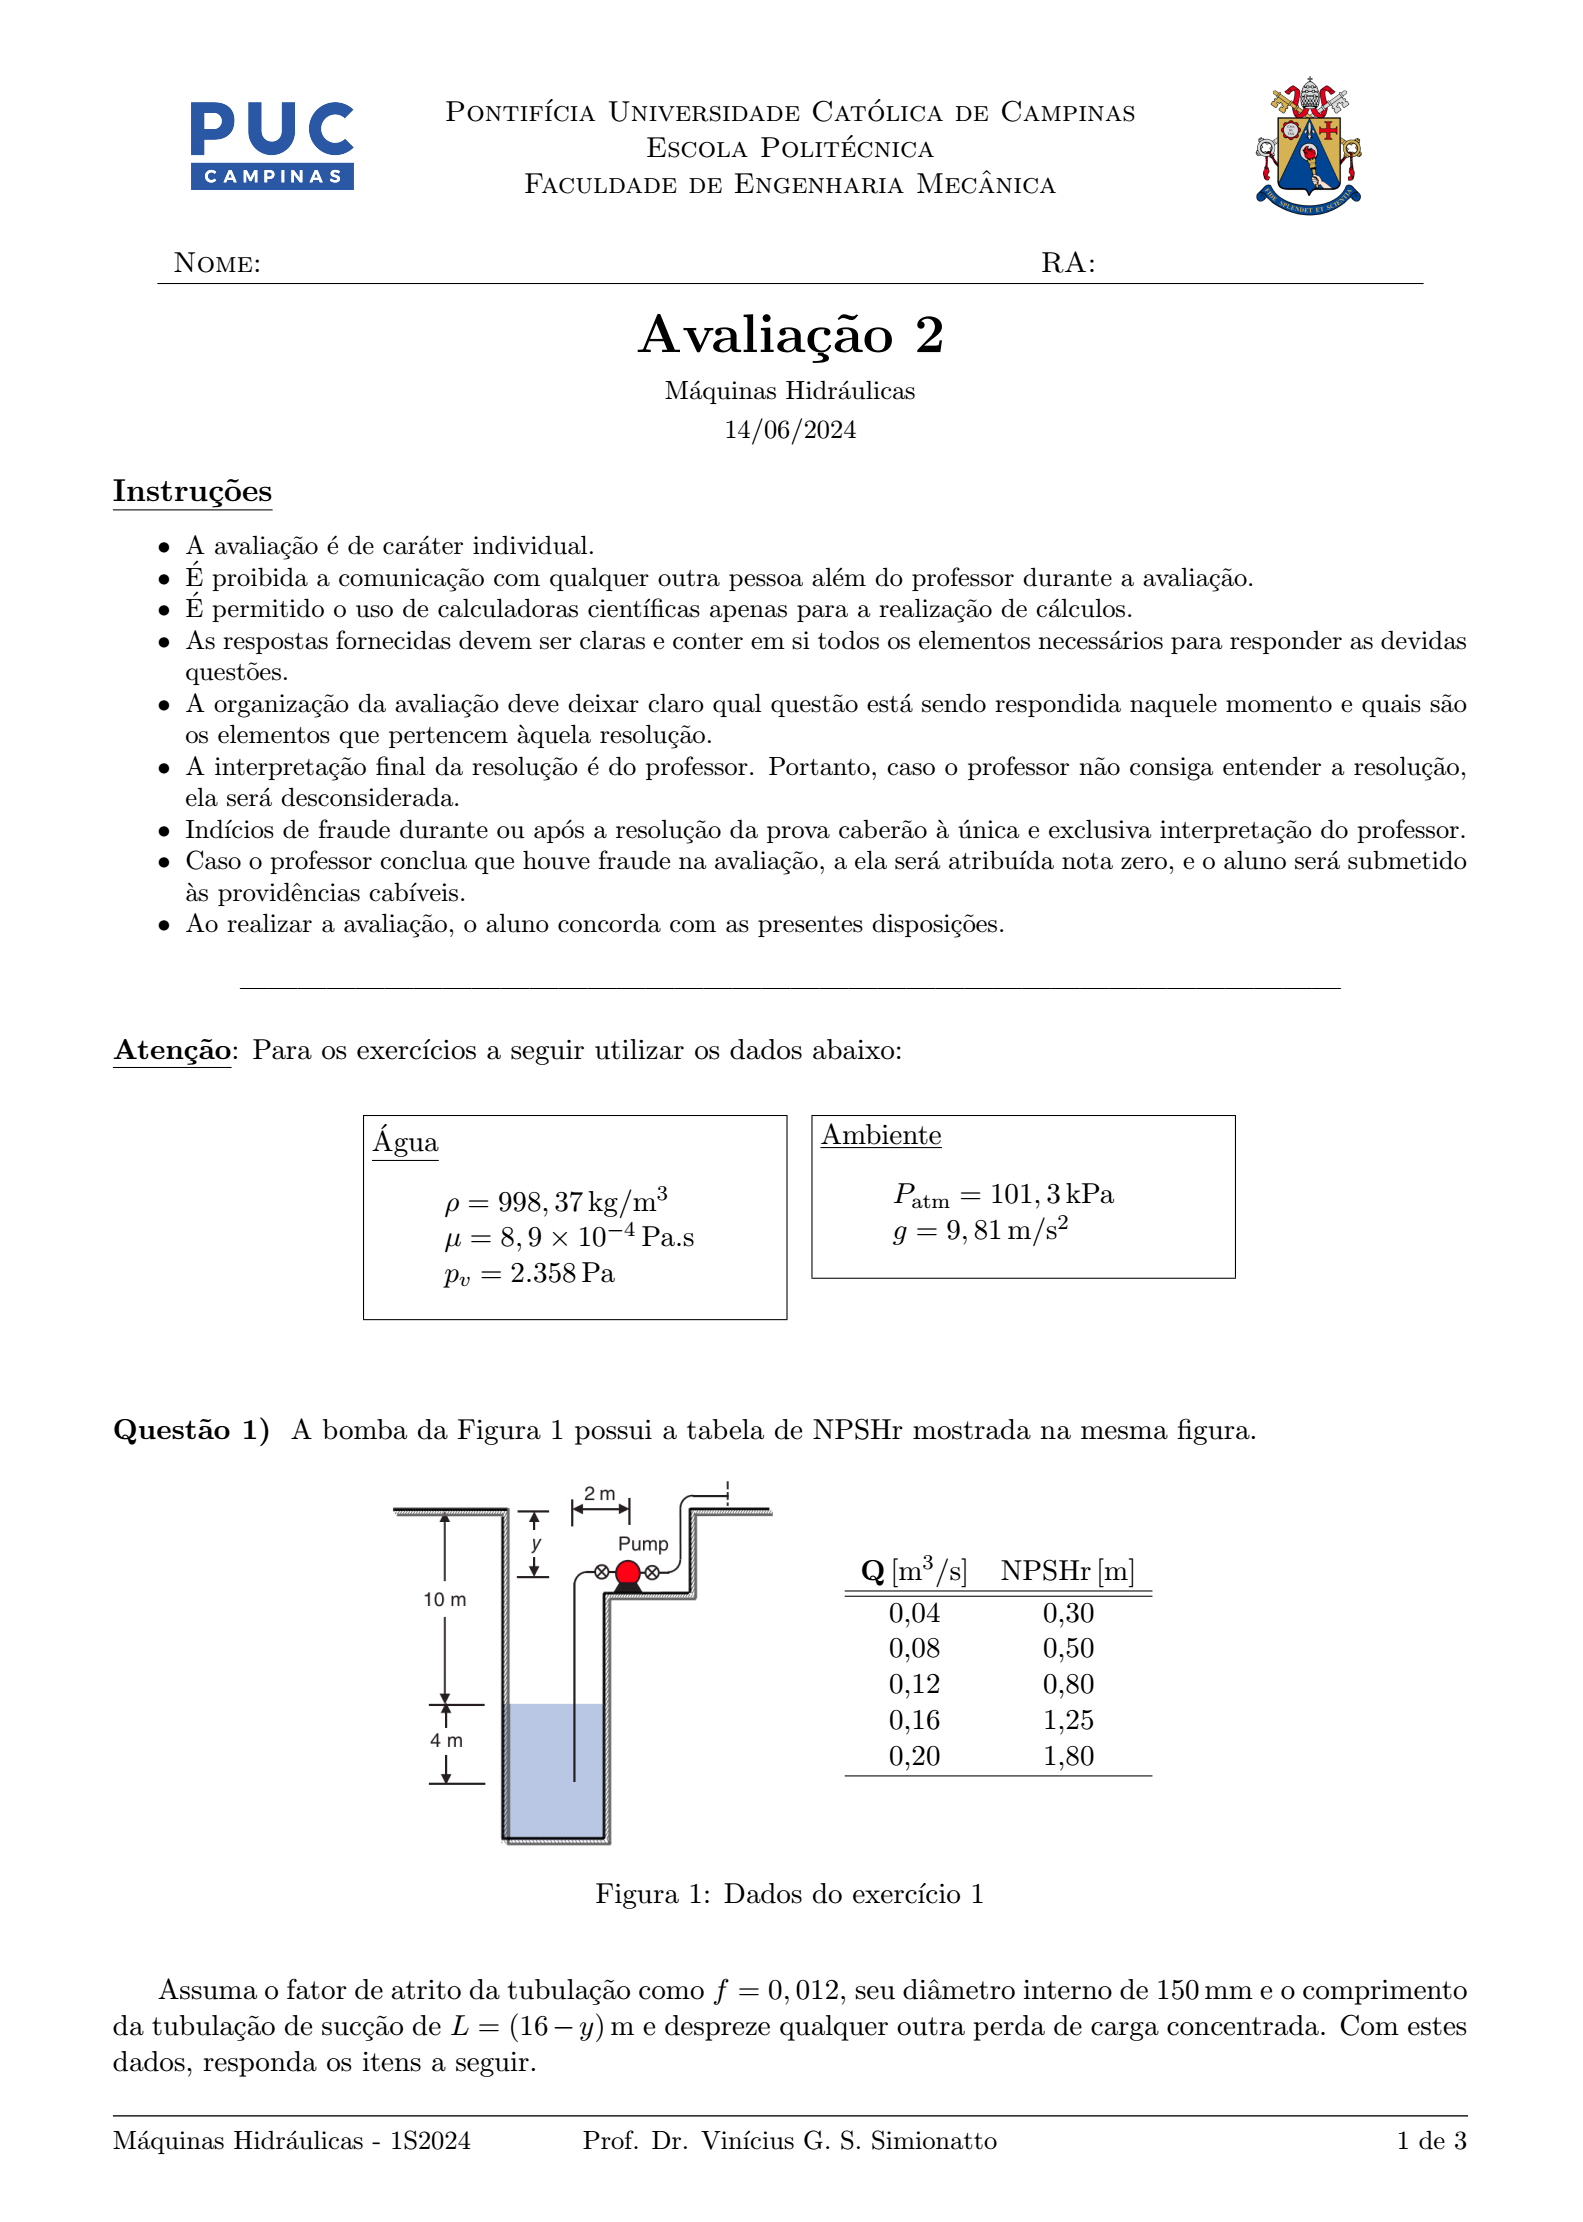

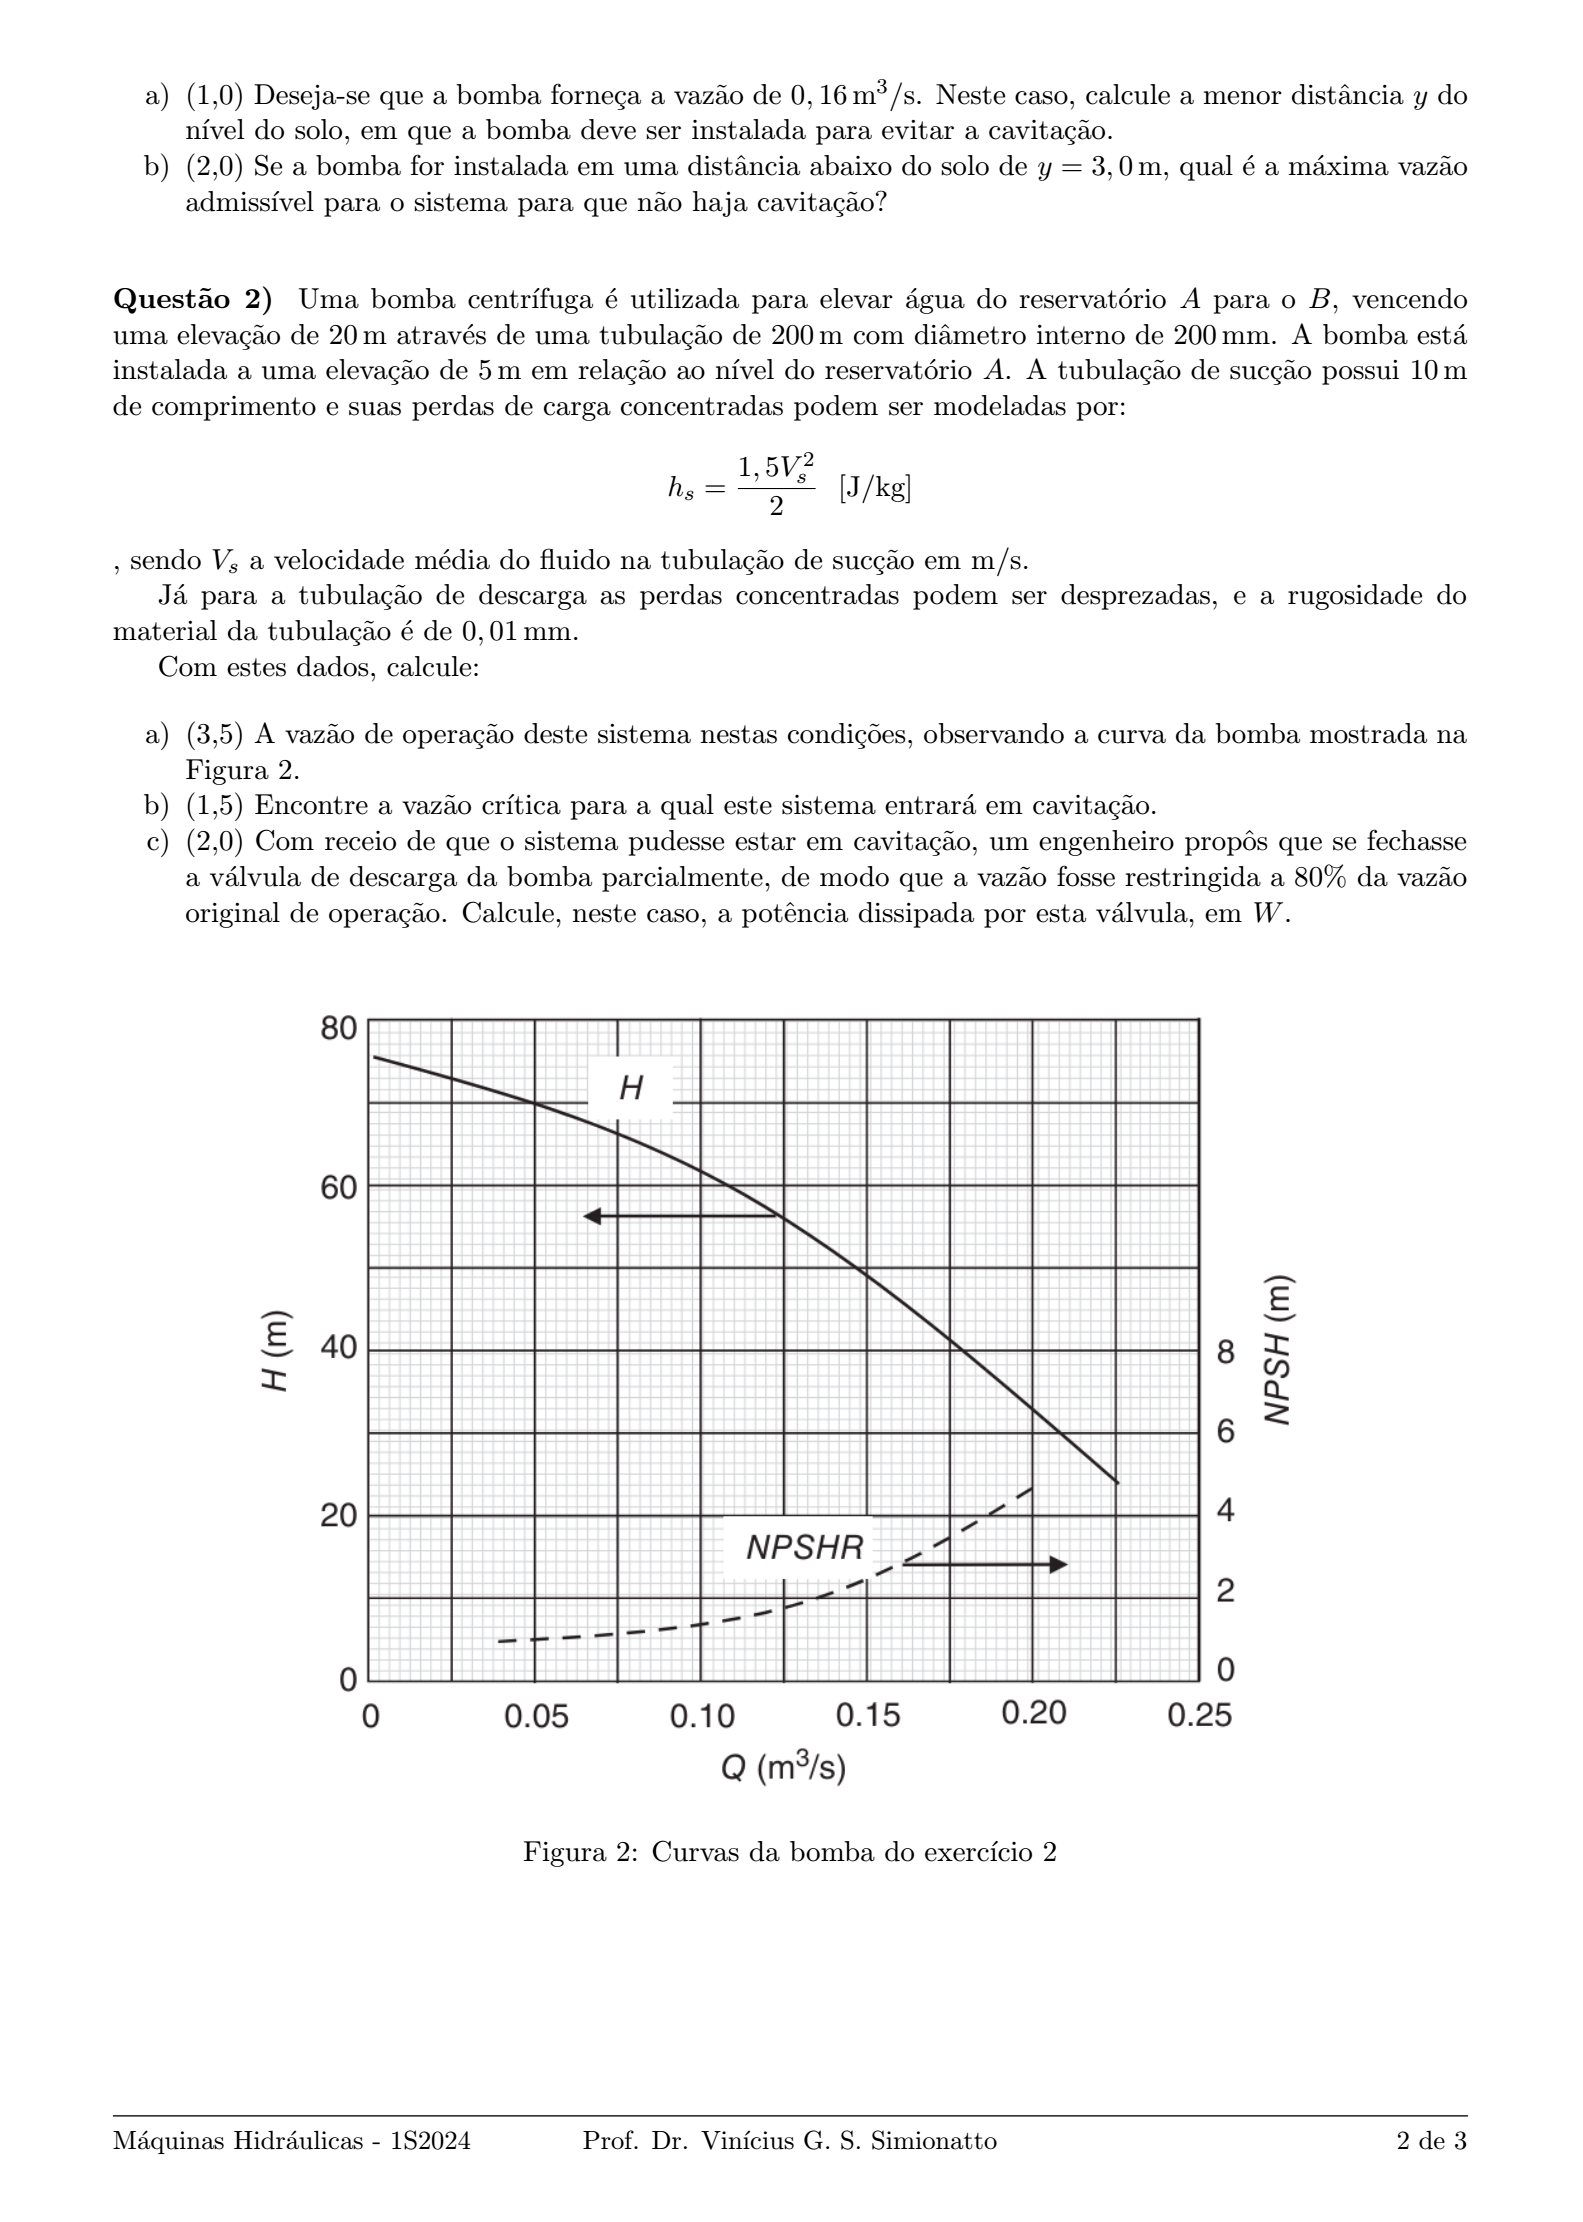

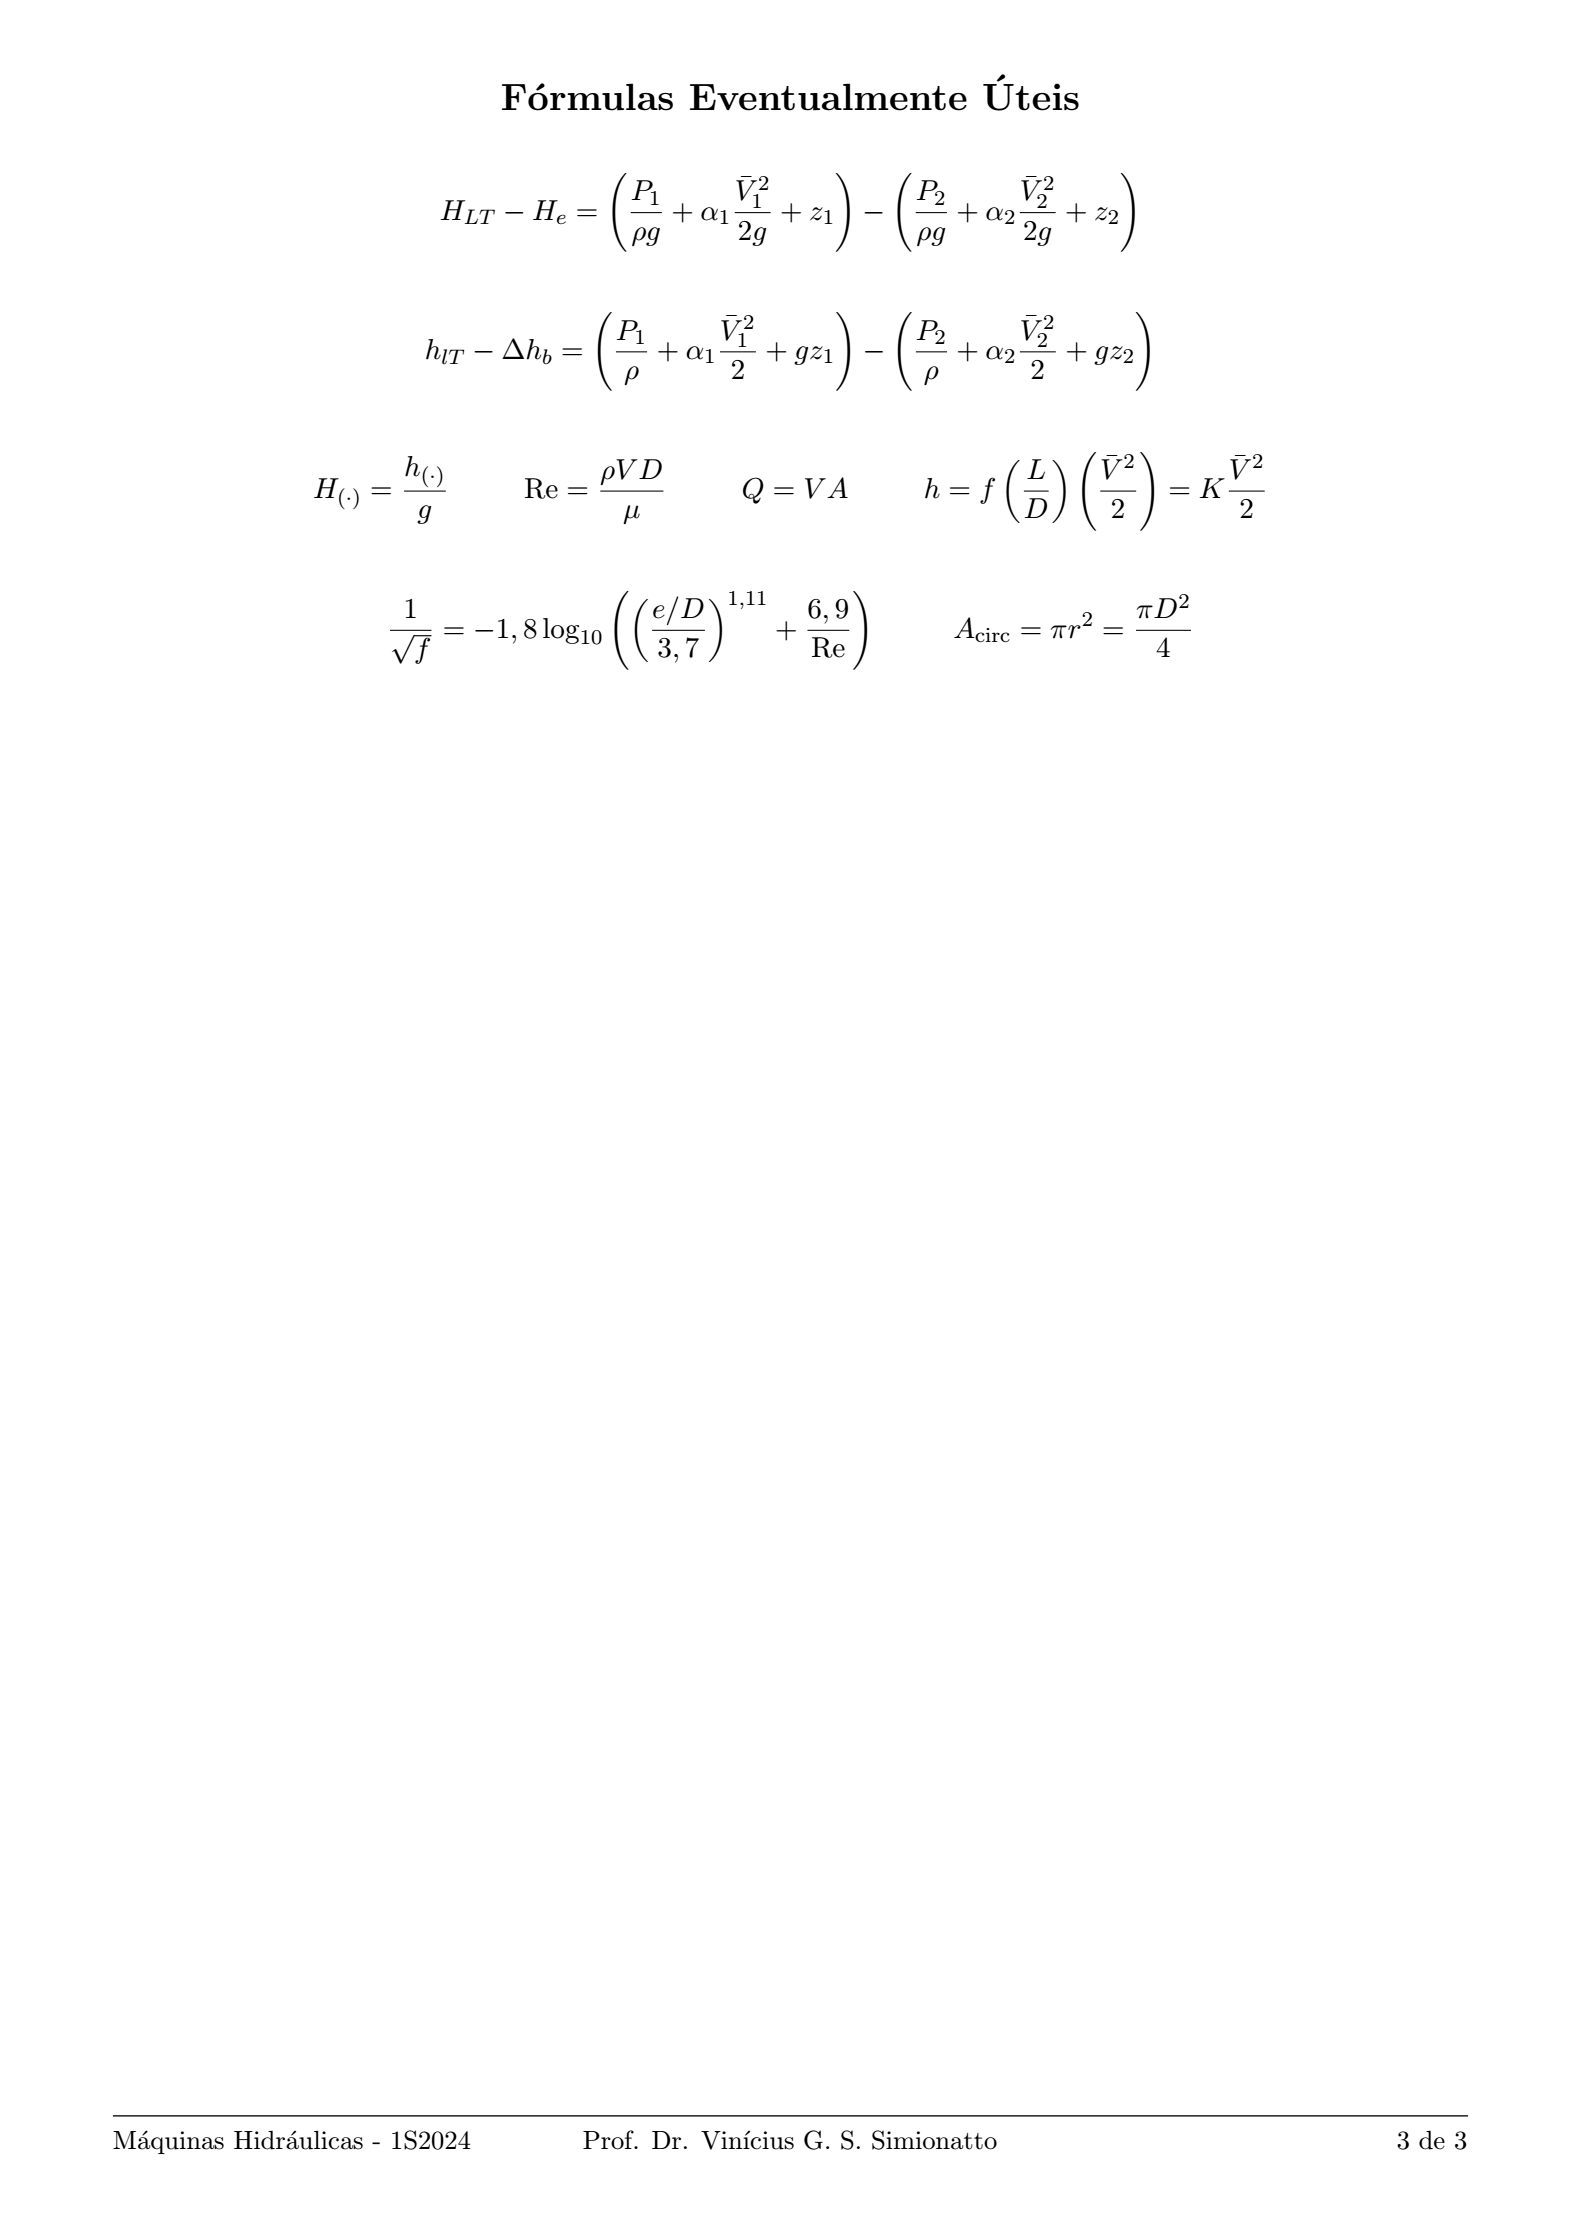

## Solução

### Questão 1 a)

Deste caso é necessário aplicar a equação da perda de carga entre o nível do reservatório de sucção (ponto 1) e a entrada da sucção da bomba (ponto 2). Como não há bomba no trajeto de 1 a 2, a equação é da forma:

$$
H_{lt} = \left(\frac{P_1}{\rho g}+\alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g}+\alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right)
$$

No ponto 1 a pressão é a atmosférica, a velocidade é nula e a elevação também, uma vez que podemos tomar este ponto como referência para o cálculo de $z$. Já no ponto 2, a pressão $P_2$ é a pressão de sucção que se deseja calcular, a velocidade $\bar{V}_2$ é dada pela vazão e a elevação $z_2$ é dada por $10-y$.

Assim, a equação fica na forma:

$$
H_{lt} = \frac{P_{\mathrm{atm}}-P_2}{\rho g} - \alpha_2 \frac{Q^2}{2gA^2} - (10-y)
$$

Já a perda de carga é dada por:
$$
H_{lt} = f\left(\frac{16-y}{0,15}\right)\left(\frac{Q^2}{2gA^2}\right)
$$

A pressão $P_2$ é calculada em função de $y$ na forma:

$$
P_2 = P_{atm} - \alpha_2 \frac{\rho Q^2}{2A^2} - \rho g (10-y) - \rho f \left( \frac{16-y}{0,15}\right)\left(\frac{Q^2}{2A^2}\right)
$$

Portanto:

$$
P_2 = \left[P_{atm} - \alpha_2 \frac{\rho Q^2}{2A^2} - \rho g (10) - \rho f \left( \frac{16}{0,15}\right)\left(\frac{Q^2}{2A^2}\right)\right] + \left[\rho g + \rho f \left(\frac{1}{0,15}\right)\left(\frac{Q^2}{2A^2}\right)\right] y
$$

Os resultados são mostrados a seguir:

In [ ]:
%reset -f

from numpy import pi

g = 9.81        # m/s²
D = 0.15        # m
P_atm = 101300  # Pa
rho = 998.37    # kg/m³
alpha_2 = 1     # ---
L = 16          # m
Hn = 10         # m
Q = 0.16        # m³/s
f = 0.012       # ---
pv = 2358       # Pa

A = pi*D**2/4

C1 = P_atm - alpha_2*rho*Q**2/(2*A**2) - rho*g*Hn - rho*f*(L/D)*(Q**2/(2*A**2))

C2 = rho*g + rho*f*(1/D)*(Q**2)/(2*A**2)

print(f'P2 = {C1:.2f} + {C2:.2f}*y [Pa]')

P2 = -89942.22 + 13067.77*y [Pa]


Deseja-se que $\mathrm{NPSH} > \mathrm{NPSHr}$. Portanto:

$$
\frac{P_2-p_v}{\rho g} > 1,25
$$

Ou seja:

$$
P_2 > 1,25 \rho g + p_v
$$

Como $P_2 = C_1 + C_2y$, então:

$$
C_1 + C_2y > 1,25 \rho g + p_v
$$

Ou seja:
$$
y > \frac{1,25 \rho g + p_v - C_1}{C_2}
$$

O resultado é mostrado a seguir:


In [ ]:
y_crit = (1.25*rho*g + pv - C1)/C2

print(f'y > {y_crit:.2f} m')

y > 8.00 m


### Questão 1 b)

Aplicando o mesmo equacionamento da questão anterior, temos:

$$
P_2 = P_{atm} - \alpha_2 \frac{\rho Q^2}{2A^2} - \rho g (10-y) - \rho f \left( \frac{16-y}{0,15}\right)\left(\frac{Q^2}{2A^2}\right)
$$

Porém, desta vez, $y$ é conhecido, e pode-se calcular a pressão $P_2$ em função de $Q$:

$$
P_2 = P_{atm} - \rho g (10-y) - \left(\frac{\rho Q^2}{2A^2}\right)\left( \alpha_2 + f\left(\frac{16-y}{0.15}\right)\right) = C_1' + C_2' Q^2
$$

Os resultados para $C_1'$ e $C_2'$ são mostrados a seguir:

In [ ]:
C1p = P_atm - rho*g*(Hn-3)
C2p = -(rho/(2*A**2))*(alpha_2 + f*(L-3)/D)

print(f"C1' = {C1p:.2f}")
print(f"C2' = {C2p:.2f}")

C1' = 32741.93
C2' = -3260970.69


Com os valores de vazão da tabela, podemos calcular os valores correspondentes de NPSH:

In [ ]:
Qi = (0.04, 0.08, 0.12, 0.16, 0.20)  # m³/s

for Qix in Qi:
  NPSHx = (C1p + C2p*Qix**2 - pv)/(rho*g)
  print(f'Para Q = {Qix:.2f} m³/s, NPSH = {NPSHx:.2f} m')

Para Q = 0.04 m³/s, NPSH = 2.57 m
Para Q = 0.08 m³/s, NPSH = 0.97 m
Para Q = 0.12 m³/s, NPSH = -1.69 m
Para Q = 0.16 m³/s, NPSH = -5.42 m
Para Q = 0.20 m³/s, NPSH = -10.22 m


Comparando com os valores da tabela, até $Q = 0,08\,\mathrm{m^3/s}$ o NPSH ainda era maior do que o NPSHr. Pode-se estimar o valor da vazão crítica por interpolação. Os dados estão na tabela a seguir.

$$
\begin{array}{ccc}
Q & \mathrm{NPSH} & \mathrm{NPSHr} \\ \hline
0,08 & 0,97 & 0,30 \\
0,12 &-1,69  & 0,80 \\ \hline
\end{array}
$$

Para este intervalo, o NPSH e o NPSHr podem ser aproximados por:

$$
\mathrm{NPSH} = a_1 Q + b_1
$$

$$
\mathrm{NPSHr} = a_2 Q + b_2
$$

In [ ]:
a1 = (-1.69-0.97)/(0.12-0.08)
b1 = 0.97 - 0.08*a1

a2 = (0.8-0.3)/(0.12-0.08)
b2 = 0.3 - 0.08*a2

print(f'NPSH = {a1:.2f}*Q {b1:+.2f}')
print(f'NPSHr = {a2:.2f}*Q {b2:+.2f}')

NPSH = -66.50*Q +6.29
NPSHr = 12.50*Q -0.70


Assim, no limite, $\mathrm{NPSH} = \mathrm{NPSHr}$. Portanto:

$$
a_1 Q + b_1 = a_2 Q + b_2
$$

$$
\therefore \hspace{4mm} Q = \frac{b_2-b_1}{a_1-a_2}
$$

Os resultados se encontram a seguir:

In [ ]:
Q = (b2-b1)/(a1-a2)

print(f"Q ~ {Q:.4f} m³/s")
print(f"V ~ {Q/A:.4f} m/s")


Q ~ 0.0885 m³/s
V ~ 5.0070 m/s


### Questão 2 a)

Neste caso devemos aplicar a equação da perda de carga, tendo como ponto 1 o nível do reservatório de sucção e como ponto 2 o nível do reservatório de descarga. A equação é dada por:

$$
H_{lt} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right)
$$

Em ambos os pontos a pressão é a atmosférica e a velocidade é nula. Assim, a equação se reduz a:

$$
H_{lt} - H_e = -20
$$

As perdas de carga do sistema são a do tubo de $200\,\mathrm{m}$ e das perdas localizadas mencionadas no enunciado. Elas são representadas por:

$$
H_{lt} = \frac{f}{g}\left(\frac{200}{0,2}\right)\left(\frac{\bar{V}^2}{2}\right) + \frac{1,5}{g}\left(\frac{\bar{V}^2}{2}\right) = \left(\frac{1000f+1,5}{2g}\right)\bar{V}^2 = \left(\frac{1000f+1,5}{2gA^2}\right)Q^2
$$

Substituindo na equação anterior, temos:

$$
H_e = \left(\frac{1000f+1,5}{2gA^2}\right)Q^2+20
$$

Os valores calculados para $H_e$ representam a altura manométrica requerida pelo sistema. Para calculá-la é necessário calcular o valor de $f$, o que é feito pela aproximação de Haaland.

In [ ]:
%reset -f

from numpy import log10, pi

# Dados:

rho = 998.37  # kg/m³
D = 0.2       # m
u = 8.9e-4    # Pa.s
e = 1e-5      # m
g = 9.81      # m/s²

A = pi*(D**2)/4

def reynolds(rho, Q, D, u):
  V = Q/(pi*D**2/4)
  return rho*V*D/u

def f_haaland(e, D, Re):
  return (-1.8*log10(((e/D)/3.7)**1.11 + 6.9/Re))**-2


Qv = (0.0014, 0.025, 0.05, 0.075, 0.1, 0.125, 0.150, 0.175, 0.2, 0.225, 0.25)
# O valor mínimo para a vazão neste conjunto é explicado posteriormente.

for Qx in Qv:
  Re = reynolds(rho, Qx, D, u)
  f = f_haaland(e, D, Re)
  Hex = ((1000*f + 1.5)/(2*g*(A**2)))*(Qx**2) + 20
  print(f'He({Qx:.4f} m³/s) = {Hex:.2f} m')

He(0.0014 m³/s) = 20.00 m
He(0.0250 m³/s) = 20.57 m
He(0.0500 m³/s) = 22.05 m
He(0.0750 m³/s) = 24.37 m
He(0.1000 m³/s) = 27.50 m
He(0.1250 m³/s) = 31.44 m
He(0.1500 m³/s) = 36.18 m
He(0.1750 m³/s) = 41.71 m
He(0.2000 m³/s) = 48.03 m
He(0.2250 m³/s) = 55.13 m
He(0.2500 m³/s) = 63.02 m


A partir da interpretação gráfica, o cruzamento entre a curva do sistema e a curva da bomba ocorre em aproximadamente $Q = 0,175 \,\mathrm{m^3/s}$.

### Questão 2 b)

Para encontrar o NPSH da bomba é necessário, para vários valores de vazão, calcular a pressão na sucção da bomba. O ponto 1 da análise continua sendo o nível do reservatório de sucção, e o ponto 2 passa a ser a sucção da bomba. A equação para análise é:

$$
H_{lt} = \left(\frac{P_1}{\rho g} + \alpha_1\frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2\frac{\bar{V}_2^2}{2g} + z_2\right)
$$

Neste caso:
<ul>
  <li>$P_1 = P_{\mathrm{atm}} = 101.300 \,\mathrm{Pa}$</li>
  <li>$\bar{V}_1 = 0\,\mathrm{m/s}$</li>
  <li>$z_1 = 0\,\mathrm{m}$</li>
  <li>$P_2$ é o que queremos calcular</li>
  <li>$\bar{V}_2 = Q/A$</li>
  <li>$z_2 = 5\,\mathrm{m}$</li>
  <li>$\alpha_1 = \alpha_2 = 1$, assumindo fluxo turbulento.</li>
</ul>

---
<b>OBS</b>: Para elucidar a questão do $\alpha$, podemos calcular a mínima vazão para a qual o fluxo será turbulento. Assumiremos, por segurança, que o mínimo valor admissível para o número de Reynolds é $10.000$.

Assim:

$$
\mathrm{Re_{\min}} = \frac{4 \rho Q_{\min}}{\pi D \mu} \hspace{10mm} \therefore \hspace{10mm} Q_{\min} = \frac{\pi D \mu \mathrm{Re}_{\min}}{4\rho}
$$

O valor desta vazão mínima é mostrado a seguir:

In [ ]:
Qmin = pi*D*u*10000/(4*rho)

print(f'Qmin = {Qmin:.4f} m³/2')

Qmin = 0.0014 m³/2


Ou seja, para valores de vazão acima de $0,0014\,\mathrm{m^3/s}$, pode-se adotar $\alpha_1 = \alpha_2$ = 1

---

Assim a equação se simplifica para:

$$
H_{lt} = \frac{P_{\mathrm{atm}}-P_2}{\rho g} - \frac{8Q^2}{g\pi^2D^4} - z_2
$$

A perda de carga é dada por

$$
H_{lt} = \frac{f}{g} \left(\frac{L_s}{D}\right)\left(\frac{16 Q^2}{2\pi^2 D^4}\right) + \frac{1,5}{g}\left(\frac{16 Q^2}{2\pi^2 D^4}\right) = \left( f \left(\frac{L_s}{D}\right) + 1,5 \right) \left(\frac{8}{g\pi^2 D^4}\right) Q^2
$$

Da primeira equação, pode-se isolar $P_2$:

$$
P_2 = P_{\mathrm{atm}} - \frac{8\rho Q^2}{\pi^2D^4} - \rho g z_2 - \rho g H_{lt}
$$

Substituindo a expressão para $H_{lt}$:

$$
P_2 = P_{\mathrm{atm}} - \frac{8\rho Q^2}{\pi^2D^4} - \rho g z_2 - \rho g \left( f \left(\frac{L_s}{D}\right) + 1,5 \right) \left(\frac{8}{g\pi^2 D^4}\right) Q^2
$$

Reorganizando:
$$
P_2 = P_{\mathrm{atm}} - \rho g z_2 - \rho g \left( f \left(\frac{L_s}{D}\right) + 2,5 \right) \left(\frac{8}{g\pi^2 D^4}\right) Q^2
$$

O NPSH é dado por:
$$
\mathrm{NPSH} = \frac{P_2-p_v}{\rho g} = \frac{P_{\mathrm{atm}}-p_v}{\rho g} - z_2 - \left( f \left(\frac{L_s}{D}\right) + 2,5 \right) \left(\frac{8}{g\pi^2 D^4}\right) Q^2
$$

Podemos calcular os valores de NPSH para diversos valores de vazão. Os valores são mostrados a seguir:

In [ ]:
Patm = 101300  # Pa
pv = 2358      # Pa
z2s = 5        # m
Ls = 10        # m

for Qx in Qv:
  Re = reynolds(rho, Qx, D, u)
  f = f_haaland(e, D, Re)
  NPSHx = (Patm-pv)/(rho*g) - z2s - (f*(Ls/D)+2.5)*(8/(g*(pi**2)*(D**4)))*Qx**2
  print(f'NPSH({Qx:.4f} m³/s) = {NPSHx:.2f} m')

NPSH(0.0014 m³/s) = 5.10 m
NPSH(0.0250 m³/s) = 5.00 m
NPSH(0.0500 m³/s) = 4.69 m
NPSH(0.0750 m³/s) = 4.18 m
NPSH(0.1000 m³/s) = 3.47 m
NPSH(0.1250 m³/s) = 2.57 m
NPSH(0.1500 m³/s) = 1.48 m
NPSH(0.1750 m³/s) = 0.18 m
NPSH(0.2000 m³/s) = -1.31 m
NPSH(0.2250 m³/s) = -2.99 m
NPSH(0.2500 m³/s) = -4.88 m


Comparando os dados obtidos com a leitura do gráfico, observa-se que o cruzamento entre o NPSH e o NPSHr ocorre para $0,125 < Q < 0,150 \,\mathrm{m^3/s}$. Por isso monta-se a seguinte tabela:

$$
\begin{array}{ccc}
Q\,\mathrm{[m^3/s]} & \mathrm{NPSH}\,\mathrm{[m]} & \mathrm{NPSHr}\,\mathrm{[m]} \\ \hline
0.125 & 2.57 & 1.8\\
0.150 & 1.48 & 2.6\\ \hline
\end{array}
$$

Assim, neste intervalo, pode se aproximar estas grandezas por:
$$
\mathrm{NPSH} = a_1 Q + b_1
$$
$$
\mathrm{NPSHr} = a_2 Q + b_2
$$

No cruzamento, teremos NPHS = NPSHr. Assim se encontra a aproximação para a vazão crítica:

$$
Q_{\mathrm{crit}} = \frac{b_2-b_1}{a_1-a_2}
$$

Os valores se encontram abaixo:

In [ ]:
a1 = (1.48-2.57)/(0.15-0.125)
b1 = 2.06-0.125*a1
a2 = (2.6-1.8)/(0.15-0.125)
b2 = 1.8-0.125*a2

print(f'NPSH  = {a1:.1f}*Q {b1:+.1f}')
print(f'NPSHr = {a2:.1f}*Q {b2:+.1f}')
print()
print(f'Qcrit ~ {(b2-b1)/(a1-a2):.4f} m³/s')
print(f'Vcrit ~ {((b2-b1)/(a1-a2))/A:.4f} m/s')


NPSH  = -43.6*Q +7.5
NPSHr = 32.0*Q -2.2

Qcrit ~ 0.1284 m³/s
Vcrit ~ 4.0883 m/s


### Questão 2 c)

A perda de carga reduziu a vazão para $Q = 0,8 \times 0,175 = 0,14\,\mathrm{m^3/s}$. Assim, aplica-se novamente a equação original para a perda de carga do sistema, mas agora incluindo uma nova perda de carga com coeficiente $K_v$ desconhecido:

$$
H_{lt} - H_e = -20
$$

Com:

$$
H_{lt} = \frac{f}{g}\left(\frac{200}{0,2}\right)\left(\frac{\bar{V}^2}{2}\right) + \frac{1,5}{g}\left(\frac{\bar{V}^2}{2}\right) + \frac{K_v}{g}\left(\frac{\bar{V}^2}{2}\right) = \left(\frac{1000f+1,5+K_v}{2g}\right)\bar{V}^2 = \left(\frac{1000f+1,5+K_v}{2gA^2}\right)Q^2
$$

O valor de $H_e = 47\,\mathrm{m}$ pode ser estimado a partir do gráfico. Assim se obtém a equação:

$$
\left(\frac{1000f+1,5+K_v}{2gA^2}\right)Q^2 = H_e-20
$$

Portanto $K_v$ é dado por:

$$
K_v = \frac{2gA^2(H_e-20)}{Q^2}-1,5-1000f
$$

O valor de $K_v$ é mostrado a seguir:

In [ ]:
Q = 0.8*0.175  # m³/s
He = 47   # m

Re = reynolds(rho, Q, D, u)
f = f_haaland(e, D, Re)

Kv = 2*g*(A**2)*(He-20)/(Q**2) - 1.5 - 1000*f

print(f'Kv = {Kv:.4f}')

Kv = 12.6550


A potência dissipada é dada por:
$$
\dot{W} = h_{l} \dot{m} = h_l \rho Q = \rho Q K_v \frac{\bar{V}^2}{2} = \frac{K_v \rho Q^3}{2A^2}
$$

O resultado é mostrado a seguir:

In [ ]:
W = Kv*rho*(Q**3)/(2*(A**2))

print(f'W = {W:.2f} W')

W = 17563.33 W
